## Project Big Data Analytic (Scraping, Prepocessing, dan Visualisasi dataset )

#### MUANSYAH ALAMI ROBBI
#### 185410172

# Import Library and load Data

Dataset diperoleh dari hasil scrapping pada twitter dengan twitter scraper. Yang diambil pada bulan juni 2020.
<br>Install twitterscrapper → apabila belum ada. <br>Buka cmd/terminal dan Gunakan perintah `pip install twitterscraper` 
<img src=scraping.png >
</img>

In [17]:
import pandas as pd
data=pd.read_csv('isu pki.csv', escapechar='\\')

Setelah datanya berhasil dibaca, lalu kita Melihat datanya (eksplorasi data) 
seperti apa datanya, 
apa aja kolomnya, 
mana yang data kategorik,  
mana variabel X (prediktor),
mana variabel y (target).

untuk datanya bisa diunduh <a href='isu pki.csv'>disini</a>

In [18]:
## melihat seberapa banyak datanya
data.shape

(100, 3)

In [19]:
# ambil 3 data dari paling atas
data.head(3)

,sentiment,text,user
0,neutral,"Dituding Mainkan Isu PKI, Haikal Hassan Sumpah...",04_adisetiawan
1,neutral,@NgkongRoses @haikal_hassan Memang semua sdh d...,Heras_24
2,neutral,@WahabisLokal @woelannnn Sy anti PKI dan HTI /...,Bowieu22


In [20]:
# ambil 3 data dari paling bawah
data.tail(3)

,sentiment,text,user
97,negative,"RT @HMSoeharto1921: Mencuatnya isu ""Pak Harto ...",Wawan31941702
98,neutral,RT @WahabisLokal: (Gatot) PKInnAliasnKadrun Ga...,herwatoe
99,neutral,RT @WahabisLokal: (Gatot) PKInnAliasnKadrun Ga...,hate_HTi


In [21]:
#ambil data secara acak sebanyak 5 data
data.sample(5)

,sentiment,text,user
82,neutral,RT @DTanjung15: Apa kabar Jongos2 bayaran Ketu...,Eddoludwig1
0,neutral,"Dituding Mainkan Isu PKI, Haikal Hassan Sumpah...",04_adisetiawan
12,neutral,RT @DTanjung15: Apa kabar Jongos2 bayaran Ketu...,HasanUm19277820
29,neutral,RT @WahabisLokal: (Gatot) PKInnAliasnKadrun Ga...,lokbin103
27,neutral,RT @BuanaEzi: Isu pki begitu gencar disuarakan...,CintaNusan


In [22]:
#datanya secara deskriptif
data.describe()

,sentiment,text,user
count,100,100,100
unique,3,43,94
top,neutral,RT @WahabisLokal: (Gatot) PKInnAliasnKadrun Ga...,Dediteulih_2016
freq,90,18,2


In [23]:
#melihat kolom yang ada
data.columns

Index(['sentiment', 'text', 'user'], dtype='object')

In [24]:
# menghitung variabel katogorik pada kolom Is_Response
data['sentiment'].value_counts()

neutral     90
negative     9
positive     1
Name: sentiment, dtype: int64

In [88]:
# mengubah data kategorik happy menjadi baik, dan not happy menjadi buruk
data['sentiment']=data['sentiment'].map({'positive':'baik','negative':'buruk', 'nuetral':'netral'})

In [89]:
# kita lihat lagi nilai pada is_response apakah sudah berubah ?
data['sentiment'].value_counts()
#ternyata sudah

Series([], Name: sentiment, dtype: int64)

Setelah kita tahu, bentuk dari datanya, dan variabel yang digunakan, dimana var X nya adalah kolom `user`, kemudian var y nya adalah kolom `sentiment`

# Create Train_test
Setelah melakukan langkah di atas, maka selanjutnya adalah memisahkan data `latih` dan data `uji`, untuk memisahkananya, disini menggunakan pustaka `sklearn ~ train test split`

In [90]:
from sklearn.model_selection import train_test_split

In [113]:
X=data.sentiment
y=data.user

disini kita mulai memisahkan untuk data train dan test, dimana `x_train, x_test, y_train, y_test` ,  merupakan variabel yang akan digunakan untuk membuat model nantinya, dan `train_test_split` merupakan fungsi untuk memisahkan data dari variabel `(X,y,`, dimana pembagiannya adalah 90% (train) :10% (test) sehingga nilai `test_size` nya dalah `0.1`

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=225)

Setelah memisahkan kita dapat melihat pembagian dari masing-masing data di `x_train, x_test, y_train, y_test`

In [115]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 90
Banyak data x_test  : 10
Banyak data y_train : 90
Banyak data y_test  : 10


# Text Preprocessing
preprosesing disini adalah melakukan, cleaning data teks dengan menghapus kata kata yang tidakpenting yang tidak termsuk dalam konteks, contohnya adalah seperti berikut.

In [116]:
import re

from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords


tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+' #menghilangkan username jika twitter
pat2 = r'https?://[^ ]+' #menghilangkan situs website
combined_pat = r'|'.join((pat1, pat2)) #join pat1 dan pat 2
www_pat = r'www.[^ ]+' #menhilangkan situs website

#set_stopword yang di deskripsikan sendiri
stopword_user = set(data)


In [117]:
def proses_teks(teks):
    soup = BeautifulSoup(teks, 'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?",'|')
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-9]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [120]:
x=[]
for teks in data.text:
    x.append(proses_teks(teks))

In [121]:
clean_text=pd.DataFrame({'clean_text':x})

In [122]:
data=pd.concat([data,clean_text],axis=1)

In [123]:
data.head(5)

,sentiment,text,user,clean_text,clean_text,clean_text,clean_text,clean_text,clean_text,clean_text
0,NaN,"Dituding Mainkan Isu PKI, Haikal Hassan Sumpah...",04_adisetiawan,04 adisetiawan,04 adisetiawan,04 adisetiawan,dituding mainkan isu pki haikal hassan sumpah ...,dituding mainkan isu pki haikal hassan sumpah ...,dituding mainkan isu pki haikal hassan sumpah ...,dituding mainkan isu pki haikal hassan sumpah ...
1,NaN,@NgkongRoses @haikal_hassan Memang semua sdh d...,Heras_24,heras 24,heras 24,heras 24,memang semua sdh di skenario oleh kelompok mer...,memang semua sdh di skenario oleh kelompok mer...,memang semua sdh di skenario oleh kelompok mer...,memang semua sdh di skenario oleh kelompok mer...
2,NaN,@WahabisLokal @woelannnn Sy anti PKI dan HTI /...,Bowieu22,bowieu22,bowieu22,bowieu22,sy anti pki dan hti khilfah nnalhamdulillah is...,sy anti pki dan hti khilfah nnalhamdulillah is...,sy anti pki dan hti khilfah nnalhamdulillah is...,sy anti pki dan hti khilfah nnalhamdulillah is...
3,NaN,RT @WahabisLokal: (Gatot) PKInnAliasnKadrun Ga...,aretwett,aretwett,aretwett,aretwett,rt gatot pkinnaliasnkadrun gagal total angkat ...,rt gatot pkinnaliasnkadrun gagal total angkat ...,rt gatot pkinnaliasnkadrun gagal total angkat ...,rt gatot pkinnaliasnkadrun gagal total angkat ...
4,NaN,RT @MDR_08Ob2l: Anak² Yg Tumbuh Pasca-reform.n...,roon3651,roon3651,roon3651,roon3651,rt anak yg tumbuh pasca reform nsdh tdk mendap...,rt anak yg tumbuh pasca reform nsdh tdk mendap...,rt anak yg tumbuh pasca reform nsdh tdk mendap...,rt anak yg tumbuh pasca reform nsdh tdk mendap...


# Visualisasi Dataset dengan Seaborn

In [125]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
df=pd.read_csv('isu pki.csv',escapechar='\\')
print(df.head(5))


  sentiment                                               text            user
0   neutral  Dituding Mainkan Isu PKI, Haikal Hassan Sumpah...  04_adisetiawan
1   neutral  @NgkongRoses @haikal_hassan Memang semua sdh d...        Heras_24
2   neutral  @WahabisLokal @woelannnn Sy anti PKI dan HTI /...        Bowieu22
3   neutral  RT @WahabisLokal: (Gatot) PKInnAliasnKadrun Ga...        aretwett
4   neutral  RT @MDR_08Ob2l: Anak² Yg Tumbuh Pasca-reform.n...        roon3651


In [126]:
# menampilkan info dari dataset yang akan kita visualkan 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
sentiment    100 non-null object
text         100 non-null object
user         100 non-null object
dtypes: object(3)
memory usage: 2.5+ KB


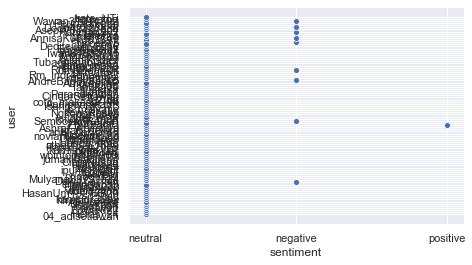

In [147]:
#Menampilkan 2 variabel sentiment dan user dari dataset df dengan module scatterplot dari package seaborn 
ax=sns.scatterplot(x='sentiment',y='user',data=df)

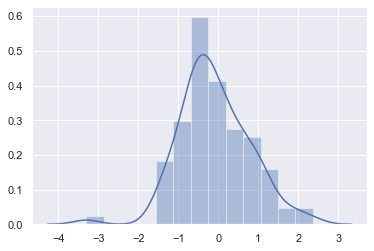

In [133]:
#Distribusi Normal  
df = np.random.normal(size=100)
sns.distplot(df)

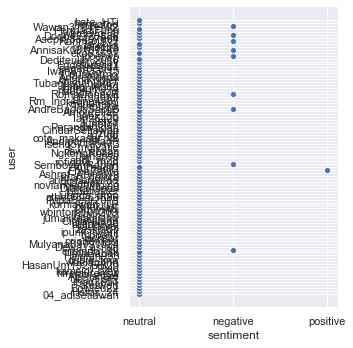

In [135]:
df=pd.read_csv('isu pki.csv',escapechar='\\')
az = sns.relplot(x="sentiment", y="user", data=df)

### KESIMPULAN
* Dari visualisasi sebanyak 100 data, sentiment terhadap <b>isu pki</b> pada twitter terdapat 3 respon negative, positive dan neutral. <BR>neutral     90
<br>negative     9
<br>positive     1
+ Data hasil scraping/crawling harus di filter agar bisa diolah dan divisualkan.
    

atau bisa di cek di github saya [KaptenNemoo](https://github.com/KaptenNemoo/Big-Data-Analytic/blob/master/Pertemuan%2014.ipynb)